In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('data.txt', sep="\t", usecols = [1,2,3,4])
# print(df)
df2 = df.drop_duplicates()
df2 = df2. reset_index(drop = True)
print(df2)

                         sender                   recipient  \
0       phillip.allen@enron.com        tim.belden@enron.com   
1       phillip.allen@enron.com     john.lavorato@enron.com   
2       phillip.allen@enron.com      leah.arsdall@enron.com   
3       phillip.allen@enron.com       randall.gay@enron.com   
4       phillip.allen@enron.com        greg.piper@enron.com   
...                         ...                         ...   
204015  john.zufferli@enron.com        kori.loibl@enron.com   
204016  john.zufferli@enron.com     john.lavorato@enron.com   
204017  john.zufferli@enron.com       dawn.doucet@enron.com   
204018  john.zufferli@enron.com      jeanie.slone@enron.com   
204019  john.zufferli@enron.com  livia_zufferli@monitor.com   

                          subject                       date  
0                             NaN  2001-05-14 16:39:00-07:00  
1                             Re:  2001-05-04 13:51:00-07:00  
2                        Re: test  2000-10-18 03:00:00

In [3]:
# Creating undirected graph
Gu = nx.from_pandas_edgelist(df2, source = 'sender', target = 'recipient', edge_attr=['date', 'subject'])

In [4]:
Gu.number_of_nodes()# undirected

27060

In [5]:
Gu.number_of_edges()#undirected

53704

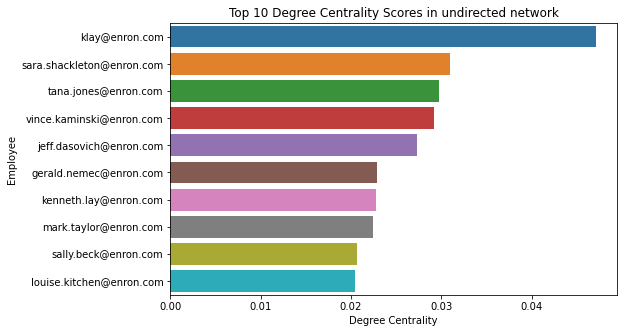

In [49]:
# Degree centrality score for undirected
employee = list()
centrality = list()
degree_cent = nx.degree_centrality(Gu)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Degree Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Degree Centrality Scores in undirected network')
plt.show()

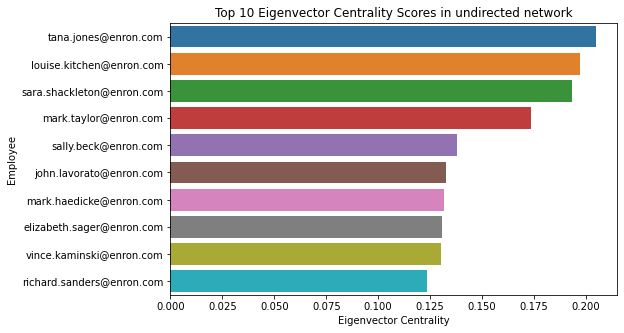

In [50]:
# Eigenvector centrality score for undirected
employee = list()
centrality = list()
degree_cent = nx.eigenvector_centrality(Gu)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Eigenvector Centrality Scores in undirected network')
plt.show()

In [51]:
# # Closeness centrality score for undirected
# employee = list()
# centrality = list()
# degree_cent = nx.closeness_centrality(Gu)

# for name, centrality_score in degree_cent.items():
#     employee.append(name)
#     centrality.append(centrality_score)

# degree_cent = pd.DataFrame()    
# degree_cent['employee'] = employee
# degree_cent['centrality'] = centrality
# degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

# plt.figure(figsize=(8,5))
# sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
# plt.xlabel('Closeness Centrality')
# plt.ylabel('Employee')
# plt.title('Top 10 Closeness Centrality Scores in undirected network')
# plt.show()

In [52]:
# Creating directed graph
Gd = nx.from_pandas_edgelist(df2, source = 'sender', target = 'recipient', edge_attr=['date', 'subject'], create_using = nx.DiGraph())

In [53]:
Gd.number_of_nodes()# directed

27060

In [54]:
Gd.number_of_edges()#directed

63760

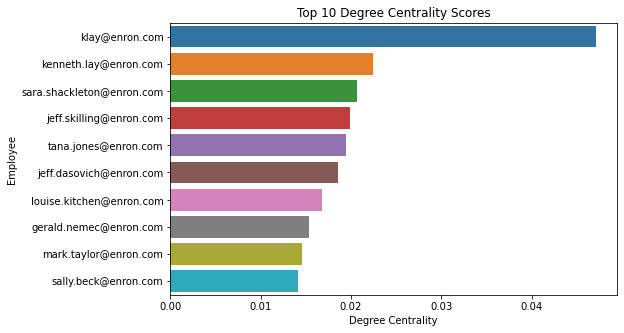

In [55]:
# In Degree centrality score for directed
employee = list()
centrality = list()
degree_cent = nx.in_degree_centrality(Gd)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Degree Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Degree Centrality Scores')
plt.savefig("Degree Centrality.png")
plt.show()

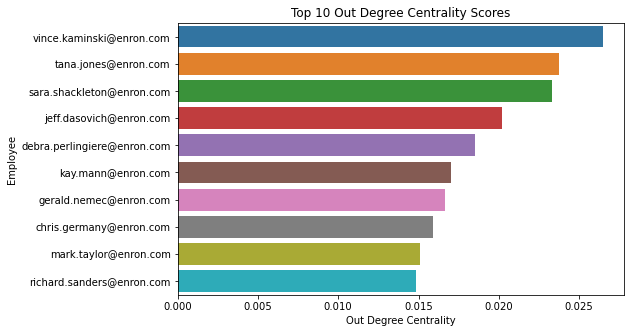

In [56]:
# Out Degree centrality score for directed
employee = list()
centrality = list()
degree_cent = nx.out_degree_centrality(Gd)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Out Degree Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Out Degree Centrality Scores')
plt.show()

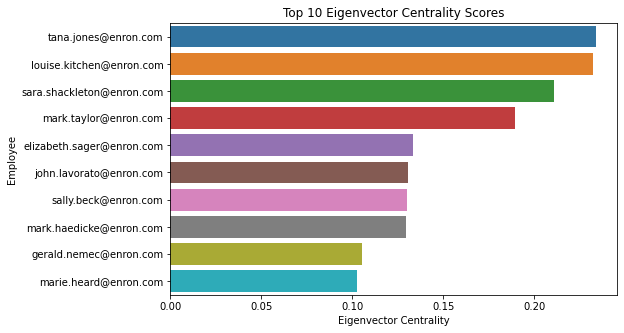

In [57]:
# Eigenvector centrality score for digraph
employee = list()
centrality = list()
degree_cent = nx.eigenvector_centrality(Gd)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Eigenvector Centrality Scores')
plt.savefig("Eigenvector Centrality.png")
plt.show()

In [58]:
# Creating multigraph graph
Gm = nx.from_pandas_edgelist(df2, source = 'sender', target = 'recipient', edge_attr=['date', 'subject'], create_using=nx.MultiGraph())

In [59]:
Gm.number_of_nodes()# multigraph

27060

In [60]:
Gm.number_of_edges()#multigraph

204020

In [61]:
Gm.is_directed()

False

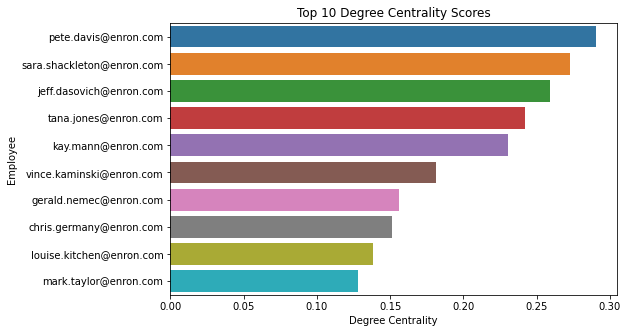

In [62]:
# Degree centrality score for multigraph
employee = list()
centrality = list()
degree_cent = nx.degree_centrality(Gm)

for name, centrality_score in degree_cent.items():
    employee.append(name)
    centrality.append(centrality_score)

degree_cent = pd.DataFrame()    
degree_cent['employee'] = employee
degree_cent['centrality'] = centrality
degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
plt.xlabel('Degree Centrality')
plt.ylabel('Employee')
plt.title('Top 10 Degree Centrality Scores')
plt.show()

In [65]:
# #Eigenvector centrality cannot be implmented for multigraph type
# # Eigenvector centrality score for multigraph
# employee = list()
# centrality = list()
# degree_cent = nx.eigenvector_centrality(Gm)

# for name, centrality_score in degree_cent.items():
#     employee.append(name)
#     centrality.append(centrality_score)

# degree_cent = pd.DataFrame()    
# degree_cent['employee'] = employee
# degree_cent['centrality'] = centrality
# degree_cent = degree_cent.sort_values(by='centrality', ascending=False)

# plt.figure(figsize=(8,5))
# sns.barplot(x='centrality', y='employee', data=degree_cent[:10], orient='h')
# plt.xlabel('Eigenvector Centrality')
# plt.ylabel('Employee')
# plt.title('Top 10 Eigenvector Centrality Scores in undirected network')
# plt.show()

In [22]:
# #not important. testing if subject names are anomalous or are related to fraudulent activity.
# for i in range(len(df2)):
#     if df2.iloc[i, 2] == 'California':
#         print(df2.iloc[i, 0], df2.iloc[i,1])

In [23]:
#getting degree values for directed graph
deg = dict(Gd.degree())
print(len(deg))

27060


In [24]:
# #plotting graph between timothy beldena and bill williams and neighbors of both
# count = 0
# tim_neighbor=[]
# tim_bill=[]
# t_b=[]
# neighbor_tim = nx.all_neighbors(Gu, 'tim.belden@enron.com')
# # print(neighbor_tim)
# for n in neighbor_tim:
#     count+=1
#     print(n)
#     t_b.append(n)
#     tim_bill.append(n)
#     tim_neighbor.append(n)
# print(count)
# print(tim_neighbor)
# print(deg['tim.belden@enron.com'])


# #plotting graph between timothy beldena and bill williams and neighbors of both
# count = 0
# bill_neighbor=[]
# neighbor_bill = nx.neighbors(Gu, 'bill.williams@enron.com')
# # print(neighbor_tim)
# for n in neighbor_bill:
#     count+=1
#     print(n)
#     tim_bill.append(n)
#     bill_neighbor.append(n)
# print(count)
# print(bill_neighbor)
# print(deg['bill.williams@enron.com'])


In [25]:
# H = nx.subgraph(Gu, bill_neighbor).copy()
# plt.figure(1,figsize=(10, 10)) 
# pos = nx.spring_layout(H)
# pos['bill.williams@enron.com'] = np.array([0,0])
# # pos['tim.belden@enron.com'] = np.array([6,0])
# nx.draw_networkx(H, pos = pos, edge_color = 'g', with_labels = True, node_size=50,font_size=6)
# plt.show

In [26]:
# bill = list(set(bill_neighbor))
# print(len(bill_neighbor))
# print(len(bill))

In [27]:
# b = ['bill.williams@enron.com']
# for n in bill_neighbor:
#     nn = nx.neighbors(Gu, n)
#     count = 0
#     for i in nn:
#         count+=1
#     if count == 1:
#         b.append(n)
#         t_b.append(n)
# print(len(b))
# print(len(t_b))

# n_size = [300]*len(b)
# n_color = ['#f9e79f']*len(b)
# n_size[0] = 500
# n_color[0] = '#d35400'
# print(n_size)
# Hb = nx.subgraph(Gu, b).copy()
# plt.figure(1,figsize=(10, 10)) 
# pos = nx.spring_layout(Hb, scale =4)
# pos['bill.williams@enron.com'] = np.array([0,0])
# # pos['tim.belden@enron.com'] = np.array([6,0])
# nx.draw(Hb, pos = pos, with_labels = True, nodelist = b, node_size=n_size,font_size = 12, node_color = n_color , edge_color = '#1B2631')
# plt.show

In [28]:
# n_size = [800]*len(t_b)
# n_color = ['#f9e79f']*len(t_b)
# n_size[0] = 500
# n_color[0] = '#d35400'
# print(n_size)
# Htb = nx.subgraph(Gu, t_b).copy()
# plt.figure(1,figsize=(20, 20), dpi = 100) 
# pos = nx.spring_layout(Htb, scale =3)
# pos['bill.williams@enron.com'] = np.array([0,0])
# # pos['tim.belden@enron.com'] = np.array([6,0])
# nx.draw(Htb, pos = pos, with_labels = True, nodelist = t_b, node_size=n_size,font_size = 12, node_color = n_color , edge_color = '#1B2631')
# plt.show

233


<function matplotlib.pyplot.show(*args, **kw)>

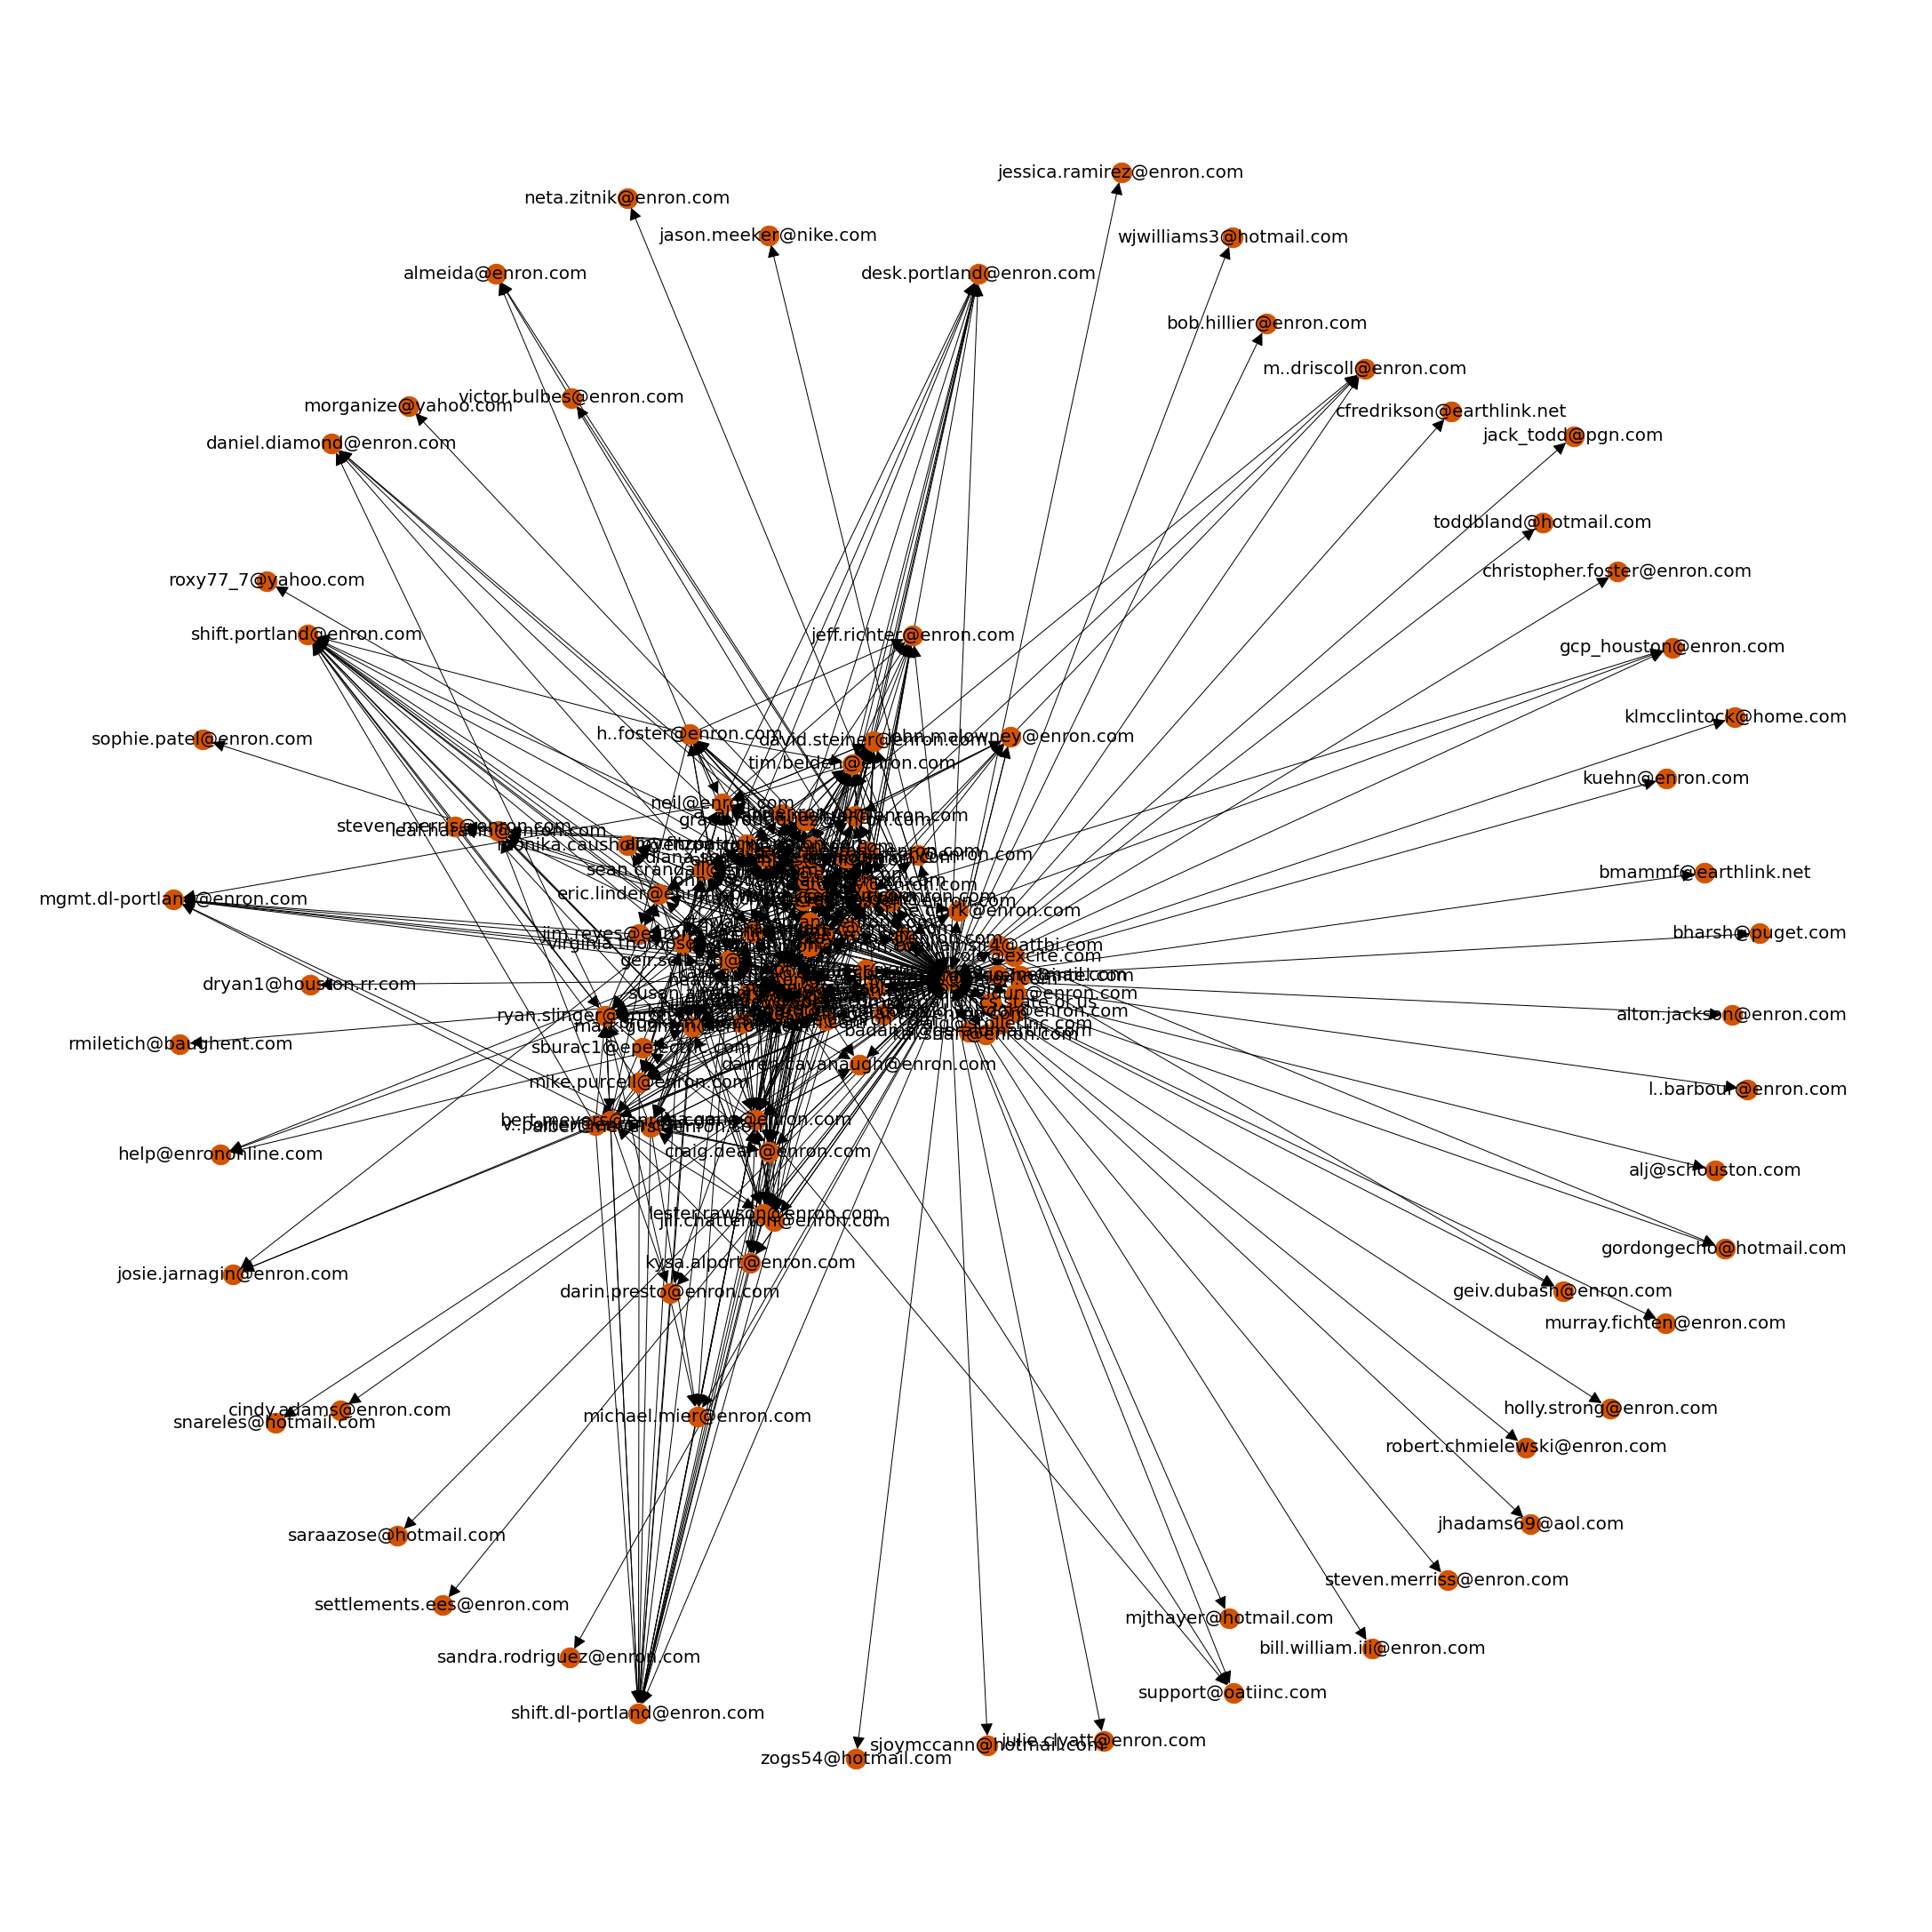

In [29]:
#Finding Ego nets of Bill Williams for directed
n = 'bill.williams@enron.com'
Bill_degree = deg[n]
print(Bill_degree)
E_Bill = nx.ego_graph(Gd, n)
plt.figure(1,figsize=(30, 30)) 
pos = nx.spring_layout(E_Bill)
# pos['bill.williams@enron.com'] = np.array([0,0])
# pos['tim.belden@enron.com'] = np.array([6,0])
nx.draw(E_Bill, pos = pos, with_labels = True, node_size=500, font_size=20, center = True, node_color = '#d35400', arrowsize = 30)
plt.savefig('Ego_net_Bill.png')
plt.show

In [30]:
#Finding Reciprocity of the Ego net of Bill
R_Bill = nx.overall_reciprocity(E_Bill)
print(R_Bill)

0.5028089887640449


1274


<function matplotlib.pyplot.show(*args, **kw)>

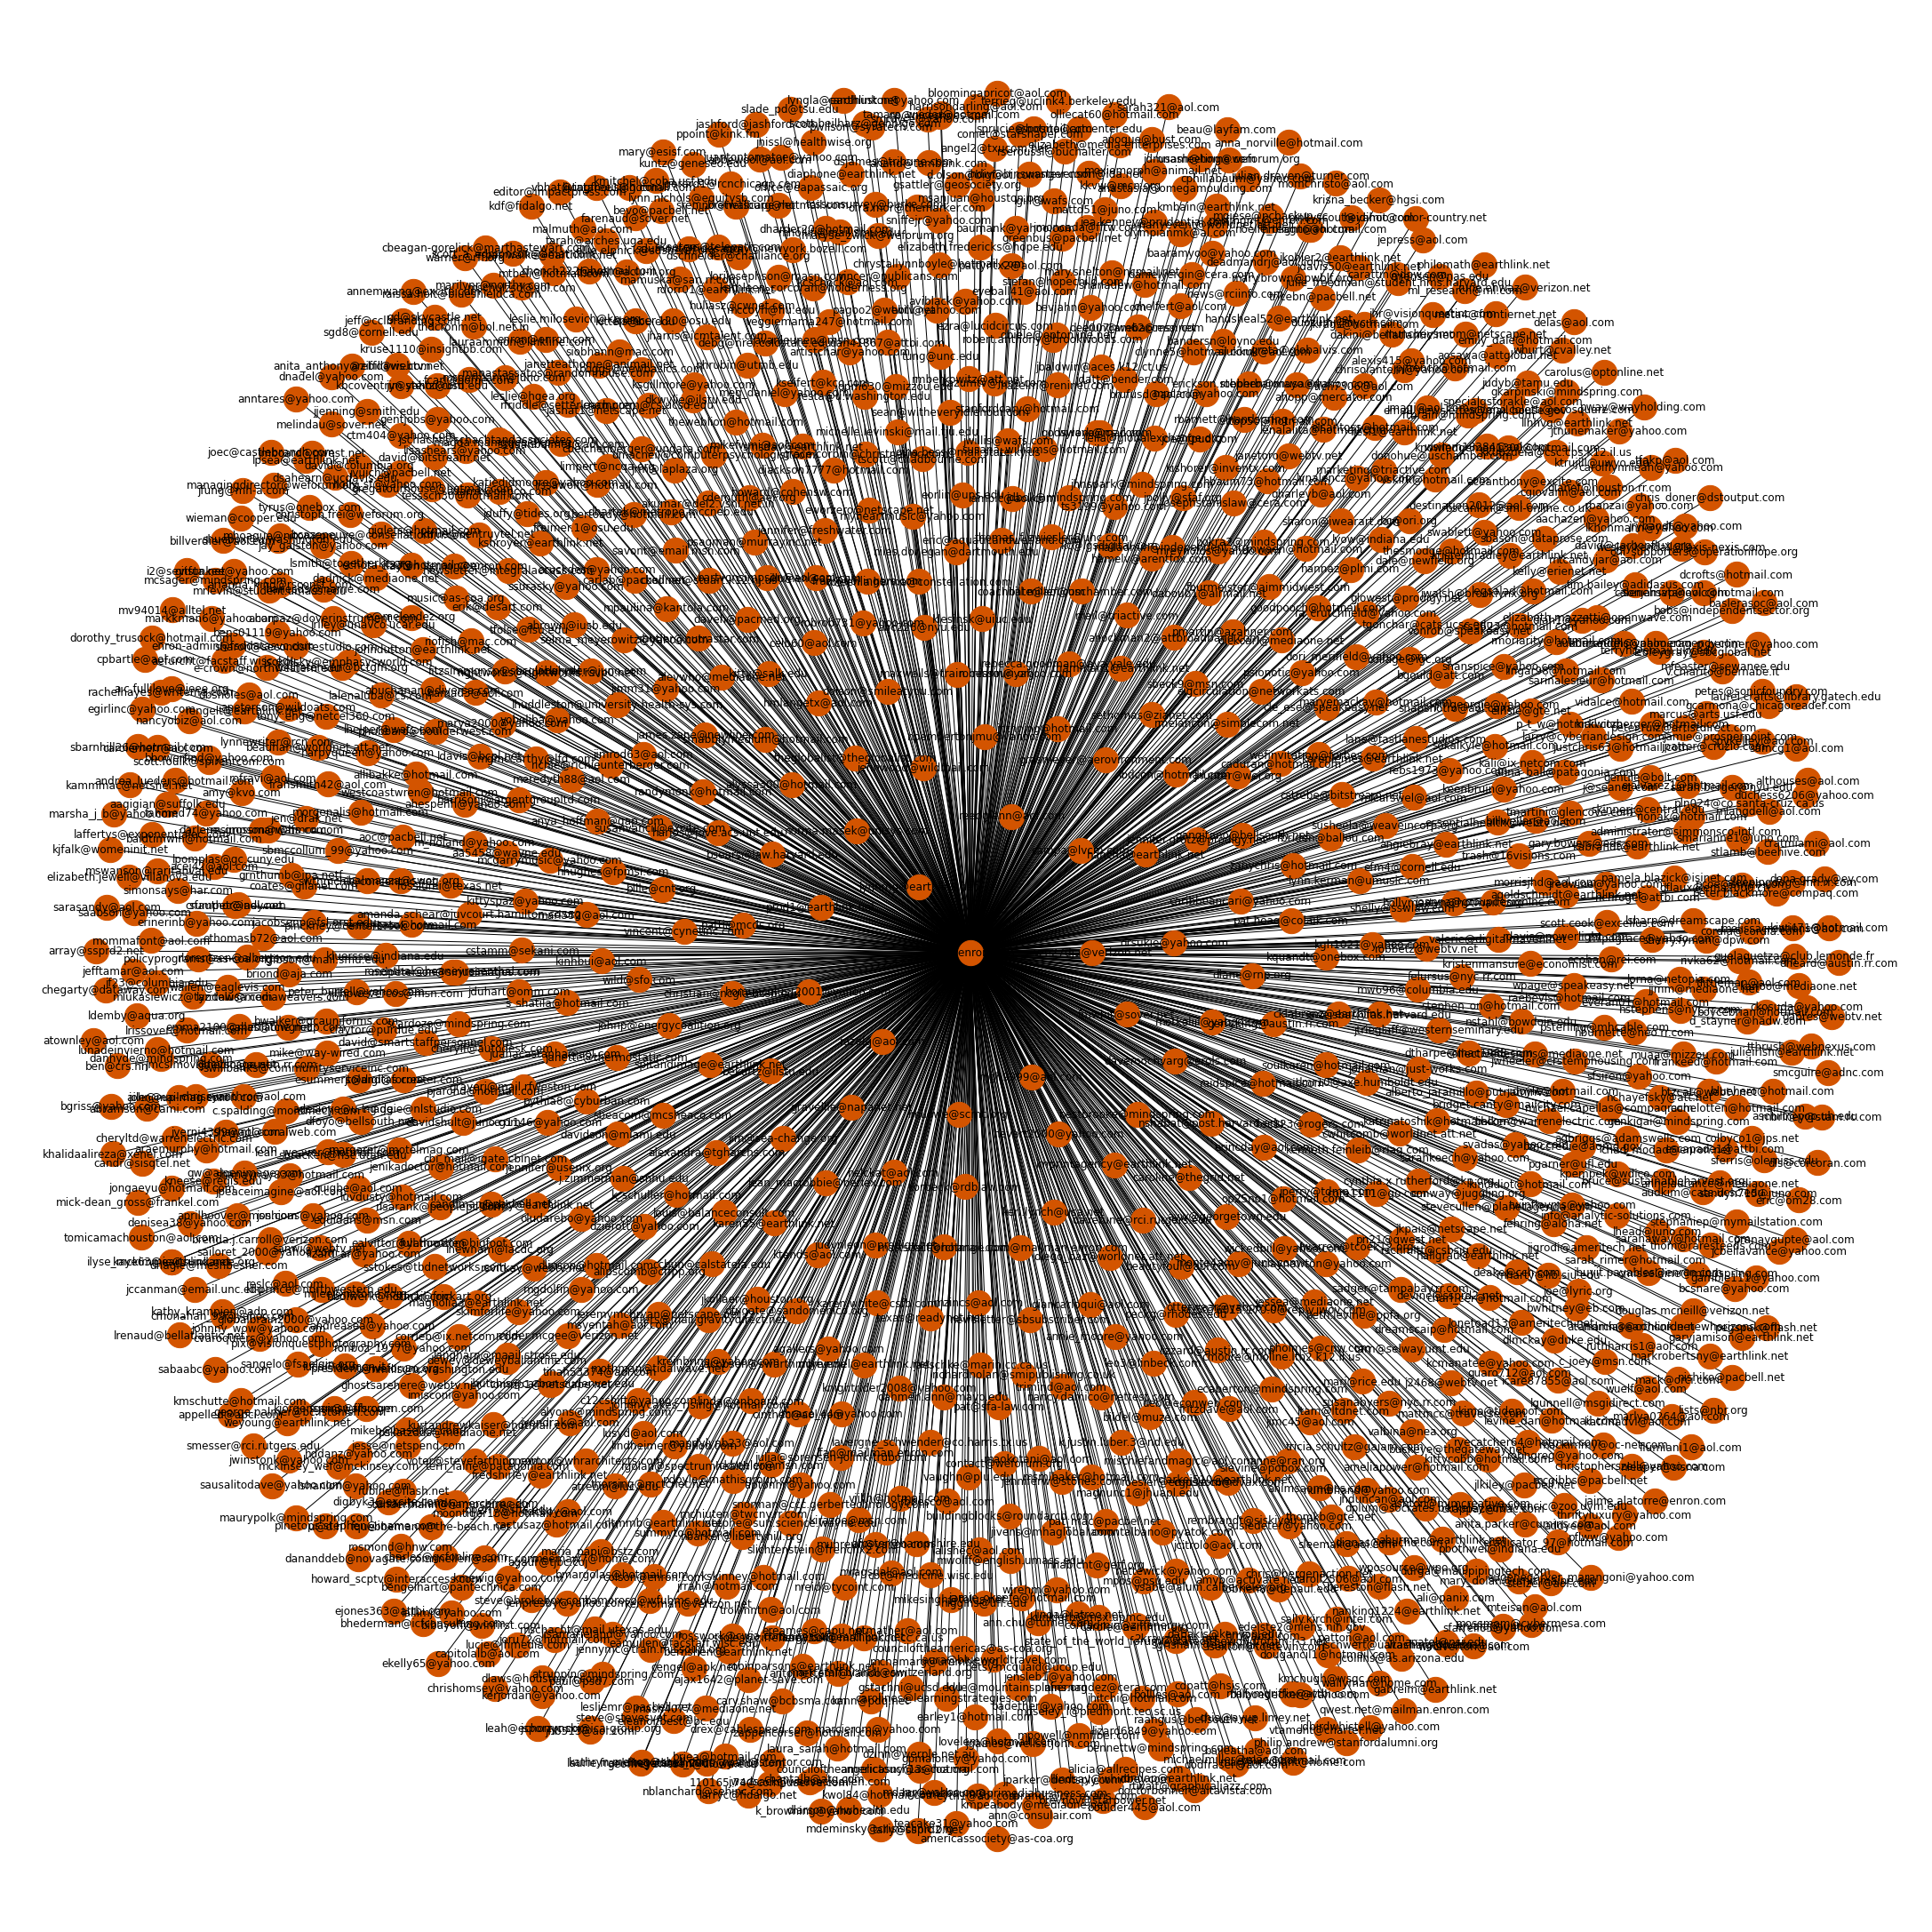

In [31]:
#Finding Ego nets of Kenneth Lay for undirected
n = 'klay@enron.com'
K_degree = deg[n]
print(K_degree)
E_Ken = nx.ego_graph(Gu, n)
plt.figure(1,figsize=(30, 30)) 
pos = nx.spring_layout(E_Ken)
# pos['bill.williams@enron.com'] = np.array([0,0])
# pos['tim.belden@enron.com'] = np.array([6,0])
nx.draw(E_Ken, pos = pos, with_labels = True, node_size=800, font_size=12, center = True, node_color = '#d35400', undirected = True)
plt.savefig('Ego_net_Ken_undirected.png')
plt.show

In [32]:
#Finding Reciprocity of the Ego net of Bill for directed graph
#not getting value as the graph is empty
# R_Ken = nx.overall_reciprocity(E_Ken)
# print(R_Ken)

1274


<function matplotlib.pyplot.show(*args, **kw)>

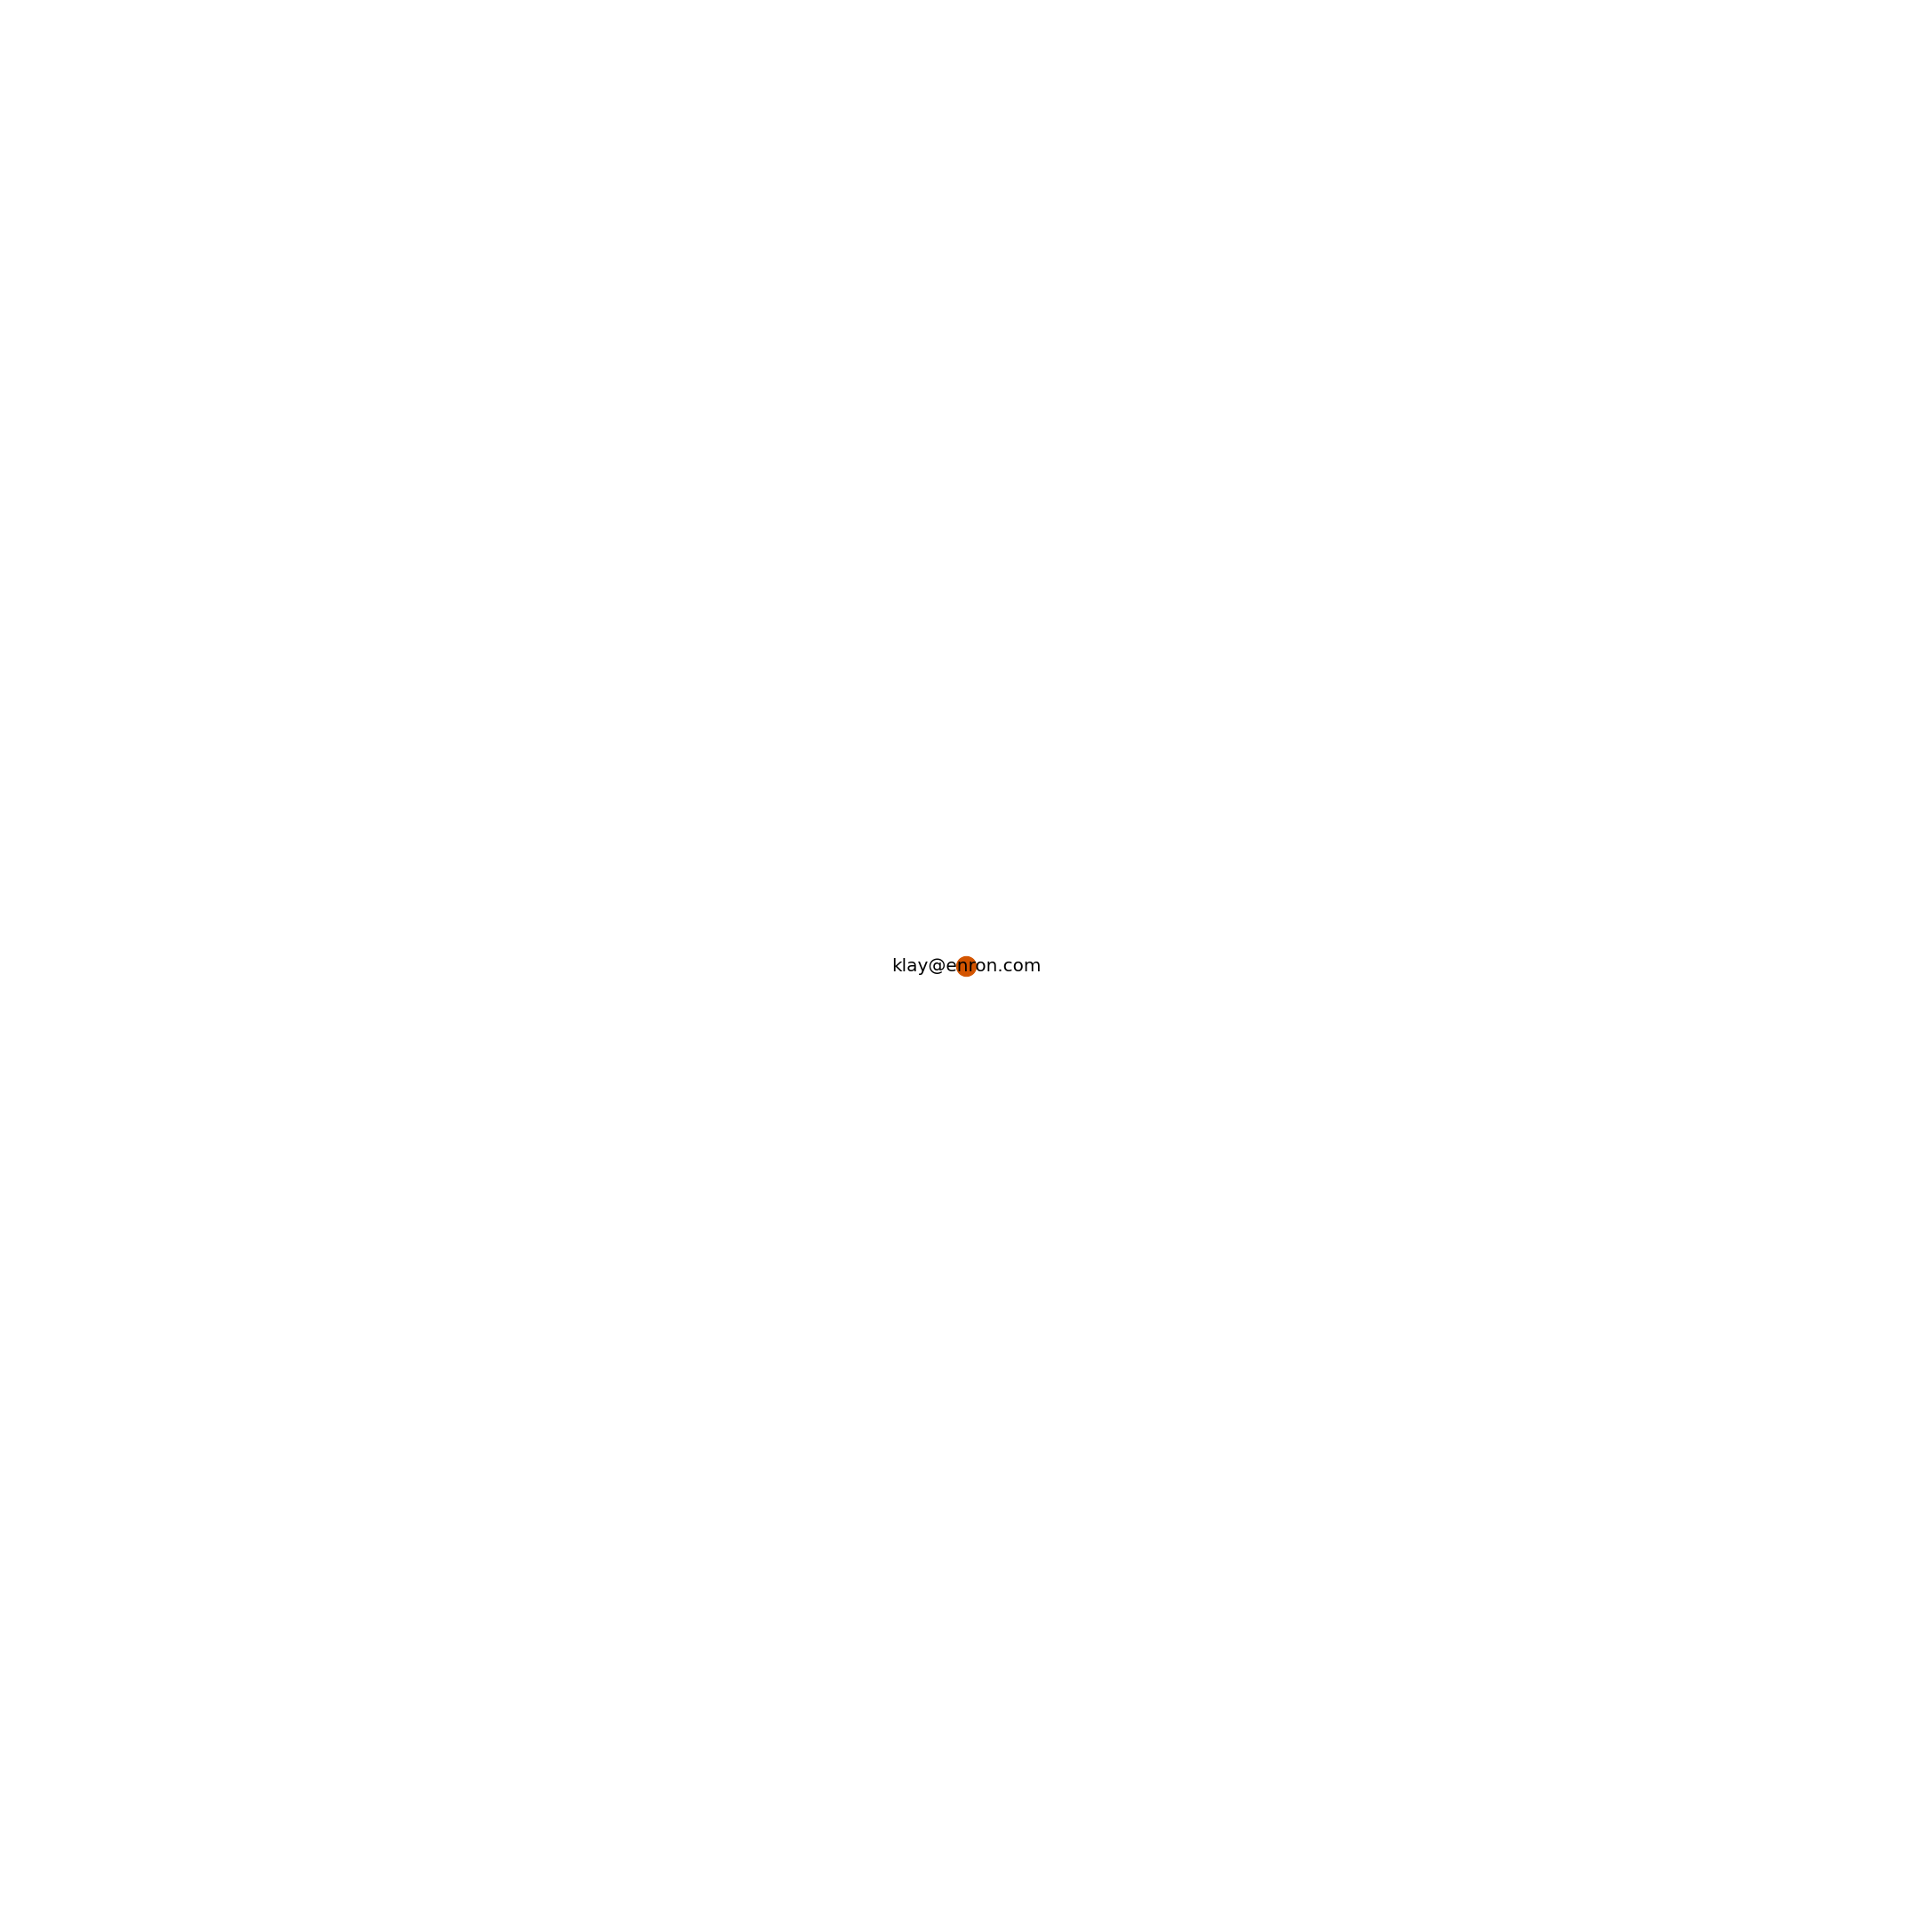

In [33]:
#Finding Ego nets of Kenneth Lay for directed
n = 'klay@enron.com'
K_degree = deg[n]
print(K_degree)
E_Ken = nx.ego_graph(Gd, n)
plt.figure(1,figsize=(30, 30)) 
pos = nx.spring_layout(E_Ken)
# pos['bill.williams@enron.com'] = np.array([0,0])
# pos['tim.belden@enron.com'] = np.array([6,0])
nx.draw(E_Ken, pos = pos, with_labels = True, node_size=500, font_size=20, center = True, node_color = '#d35400')
plt.savefig('Ego_net_Ken_directed.png')
plt.show

In [34]:
# n = 'klay@enron.com'
# for i in range(len(df)):
#     if df2.iloc[i,1] == n:
#         print(df2.iloc[i, 2])

In [35]:
# #Finding Ego nets of Steven Kean for directed
# n = 'steven.kean@enron.com'
# Steven_degree = deg[n]
# print(Steven_degree)
# E_Steven = nx.ego_graph(Gd, n)
# plt.figure(1,figsize=(30, 30)) 
# pos = nx.spring_layout(E_Steven)
# # pos['bill.williams@enron.com'] = np.array([0,0])
# # pos['tim.belden@enron.com'] = np.array([6,0])
# nx.draw(E_Steven, pos = pos, with_labels = True, node_size=500, font_size=20, center = True, node_color = '#d35400', arrowsize = 30)
# plt.savefig('Ego_net_Steven_directed.png')
# plt.show

In [36]:
# #Finding Ego nets of Sara Shackleton for directed
# n = 'sara.shackleton@enron.com'
# Sara_degree = deg[n]
# print(Sara_degree)
# E_Sara = nx.ego_graph(Gd, n)
# plt.figure(1,figsize=(30, 30)) 
# pos = nx.spring_layout(E_Sara)
# # pos['bill.williams@enron.com'] = np.array([0,0])
# # pos['tim.belden@enron.com'] = np.array([6,0])
# nx.draw(E_Sara, pos = pos, with_labels = True, node_size=500, font_size=20, center = True, node_color = '#d35400', arrowsize = 30)
# plt.savefig('Ego_net_Sara_directed.png')
# plt.show

In [38]:
# #Finding Reciprocity of the Ego net of Sara for directed graph
# R_Sara = nx.overall_reciprocity(E_Sara)
# print(R_Sara)